In [1]:
# ===========
# import all required libraries

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
from windrose import WindroseAxes


In [2]:
# 1. Gather all GRIB files from your directory, put all the .grib data into one folder
file_pattern = '/Users/hendy/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Ph.D/Publication/Geomorphology/ERA5/*.grib' # Update this to your path
files = sorted(glob.glob(file_pattern))

# 2. Open as a single dataset using dask (it happens automatically now)
ds_compiled = xr.open_mfdataset(files, engine='cfgrib', combine='by_coords')

# 3. Quick check of the time range
print(f"Successfully compiled {len(files)} files.")
print("Time Range:", ds_compiled.time.min().values, "to", ds_compiled.time.max().values)

Successfully compiled 6 files.
Time Range: 2005-01-01T00:00:00.000000000 to 2025-12-31T23:00:00.000000000


In [3]:
# Convert to dataframe and clean NaNs
df_compiled = ds_compiled.squeeze().to_dataframe().dropna(subset=['swh', 'mwp', 'mwd'])

print(f"Total compiled observations: {len(df_compiled)}")
print(df_compiled.head())

Total compiled observations: 184080
                            mwd       mwp       swh  number   step  meanSea  \
time                                                                          
2005-01-01 00:00:00  211.778412  8.968121  1.167084       0 0 days      0.0   
2005-01-01 01:00:00  211.347397  9.017252  1.176228       0 0 days      0.0   
2005-01-01 02:00:00  210.871597  9.073146  1.185504       0 0 days      0.0   
2005-01-01 03:00:00  210.329086  9.105808  1.187720       0 0 days      0.0   
2005-01-01 04:00:00  209.808502  9.133212  1.190670       0 0 days      0.0   

                     latitude  longitude          valid_time  
time                                                          
2005-01-01 00:00:00     -8.43      110.7 2005-01-01 00:00:00  
2005-01-01 01:00:00     -8.43      110.7 2005-01-01 01:00:00  
2005-01-01 02:00:00     -8.43      110.7 2005-01-01 02:00:00  
2005-01-01 03:00:00     -8.43      110.7 2005-01-01 03:00:00  
2005-01-01 04:00:00     -8.43   

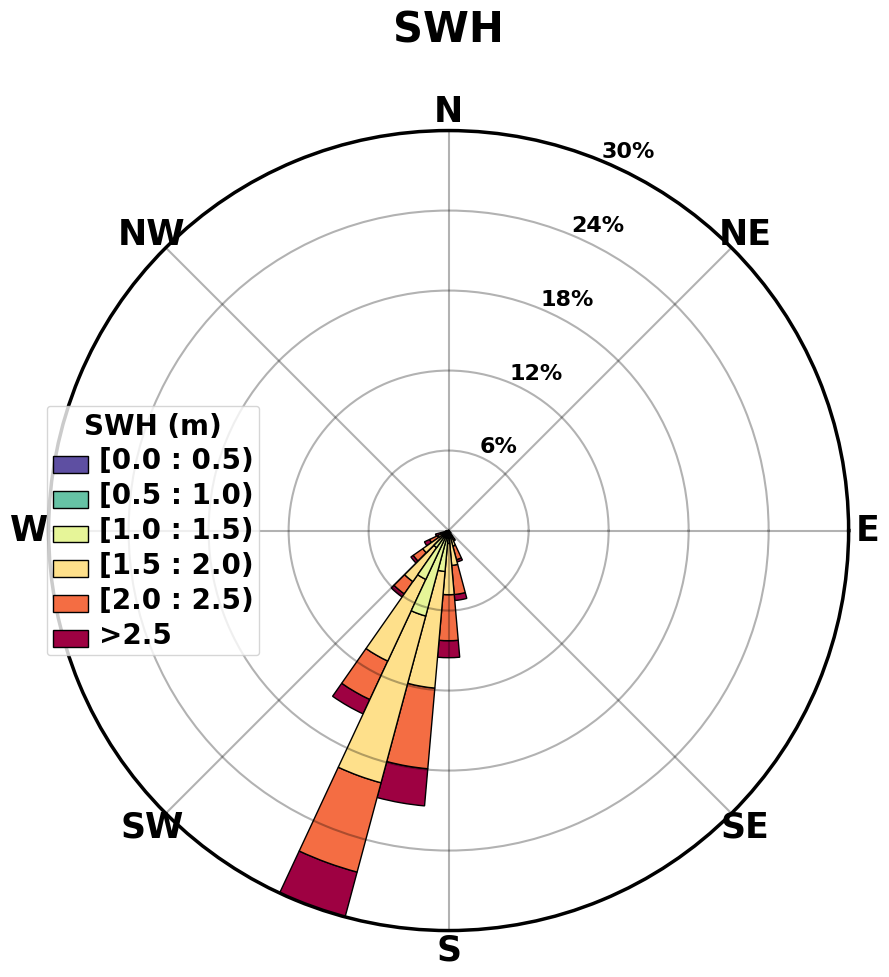

In [6]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
       
# ==========================================

fig = plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax(fig=fig)

# 1. Plot SWH Bar
# Using your preferred 0.5m increments
swh_bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5]

ax.bar(df_compiled.mwd, df_compiled.swh, 
       normed=True, 
       opening=1.0,           
       edgecolor='black',      
       linewidth=1.0,
       bins=swh_bins,          
       cmap=cm.Spectral_r,    
       nsector=36)            

# 2. Format Directional Labels
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'], 
                   fontsize=25, 
                   weight='bold')

# 3. Format Frequency Labels (% on circles)
ticks = ax.get_yticks()
ax.set_yticklabels([f"{int(x)}%" for x in ticks], 
                   fontsize=16, 
                   weight='bold',
                   color='black')

# 4. Legend with Big Bold Labels
leg = ax.set_legend(
    title="SWH (m)", 
    loc='center left', 
    bbox_to_anchor=(0, 0.5),
    handlelength=2.5,     
    handleheight=1.5,     
    labelspacing=0.5      
)

for text in leg.get_texts():
    text.set_fontsize(20)
    text.set_weight('bold')

leg.get_title().set_fontsize(20)
leg.get_title().set_weight('bold')

# 5. Add Main Title
plt.title("SWH", 
          fontsize=30, weight='bold', y=1.1)

# 6. Outlines
ax.spines['polar'].set_linewidth(2.5)
ax.grid(True, linewidth=1.5, color='black', alpha=0.3)

# 7. Save image
plt.savefig('SWH_05-25.png', dpi=300, bbox_inches='tight')
plt.show()

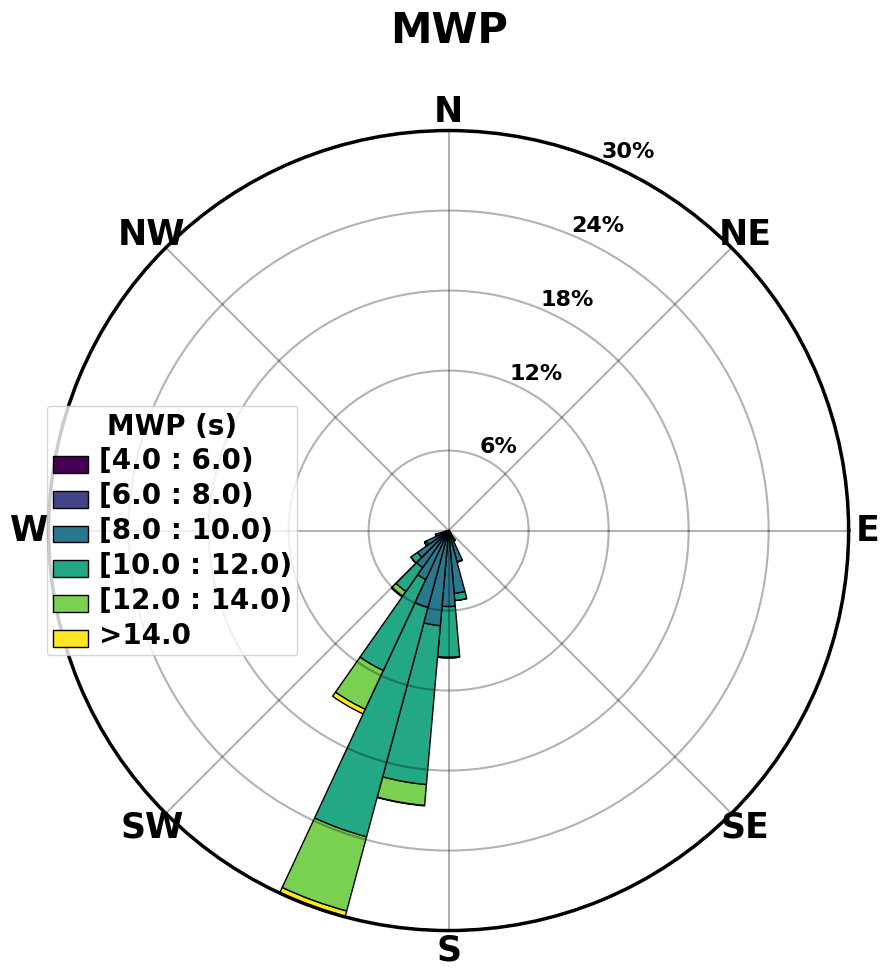

In [7]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
       
# ==========================================

fig = plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax(fig=fig)

# 1. Plot SWH Bar
# Using your preferred 0.5m increments
swh_bins = [4, 6, 8, 10, 12, 14]

ax.bar(df_compiled.mwd, df_compiled.mwp, 
       normed=True, 
       opening=1.0,           
       edgecolor='black',      
       linewidth=1.0,
       bins=swh_bins,          
       cmap=cm.viridis,    
       nsector=36)            

# 2. Format Directional Labels
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'], 
                   fontsize=25, 
                   weight='bold')

# 3. Format Frequency Labels (% on circles)
ticks = ax.get_yticks()
ax.set_yticklabels([f"{int(x)}%" for x in ticks], 
                   fontsize=16, 
                   weight='bold',
                   color='black')

# 4. Legend with Big Bold Labels
leg = ax.set_legend(
    title="MWP (s)", 
    loc='center left', 
    bbox_to_anchor=(0, 0.5),
    handlelength=2.5,     
    handleheight=1.5,     
    labelspacing=0.5      
)

for text in leg.get_texts():
    text.set_fontsize(20)
    text.set_weight('bold')

leg.get_title().set_fontsize(20)
leg.get_title().set_weight('bold')

# 5. Add Main Title
plt.title("MWP", 
          fontsize=30, weight='bold', y=1.1)

# 6. Outlines
ax.spines['polar'].set_linewidth(2.5)
ax.grid(True, linewidth=1.5, color='black', alpha=0.3)

# 7. Save image
plt.savefig('MWP05-25.png', dpi=300, bbox_inches='tight')
plt.show()

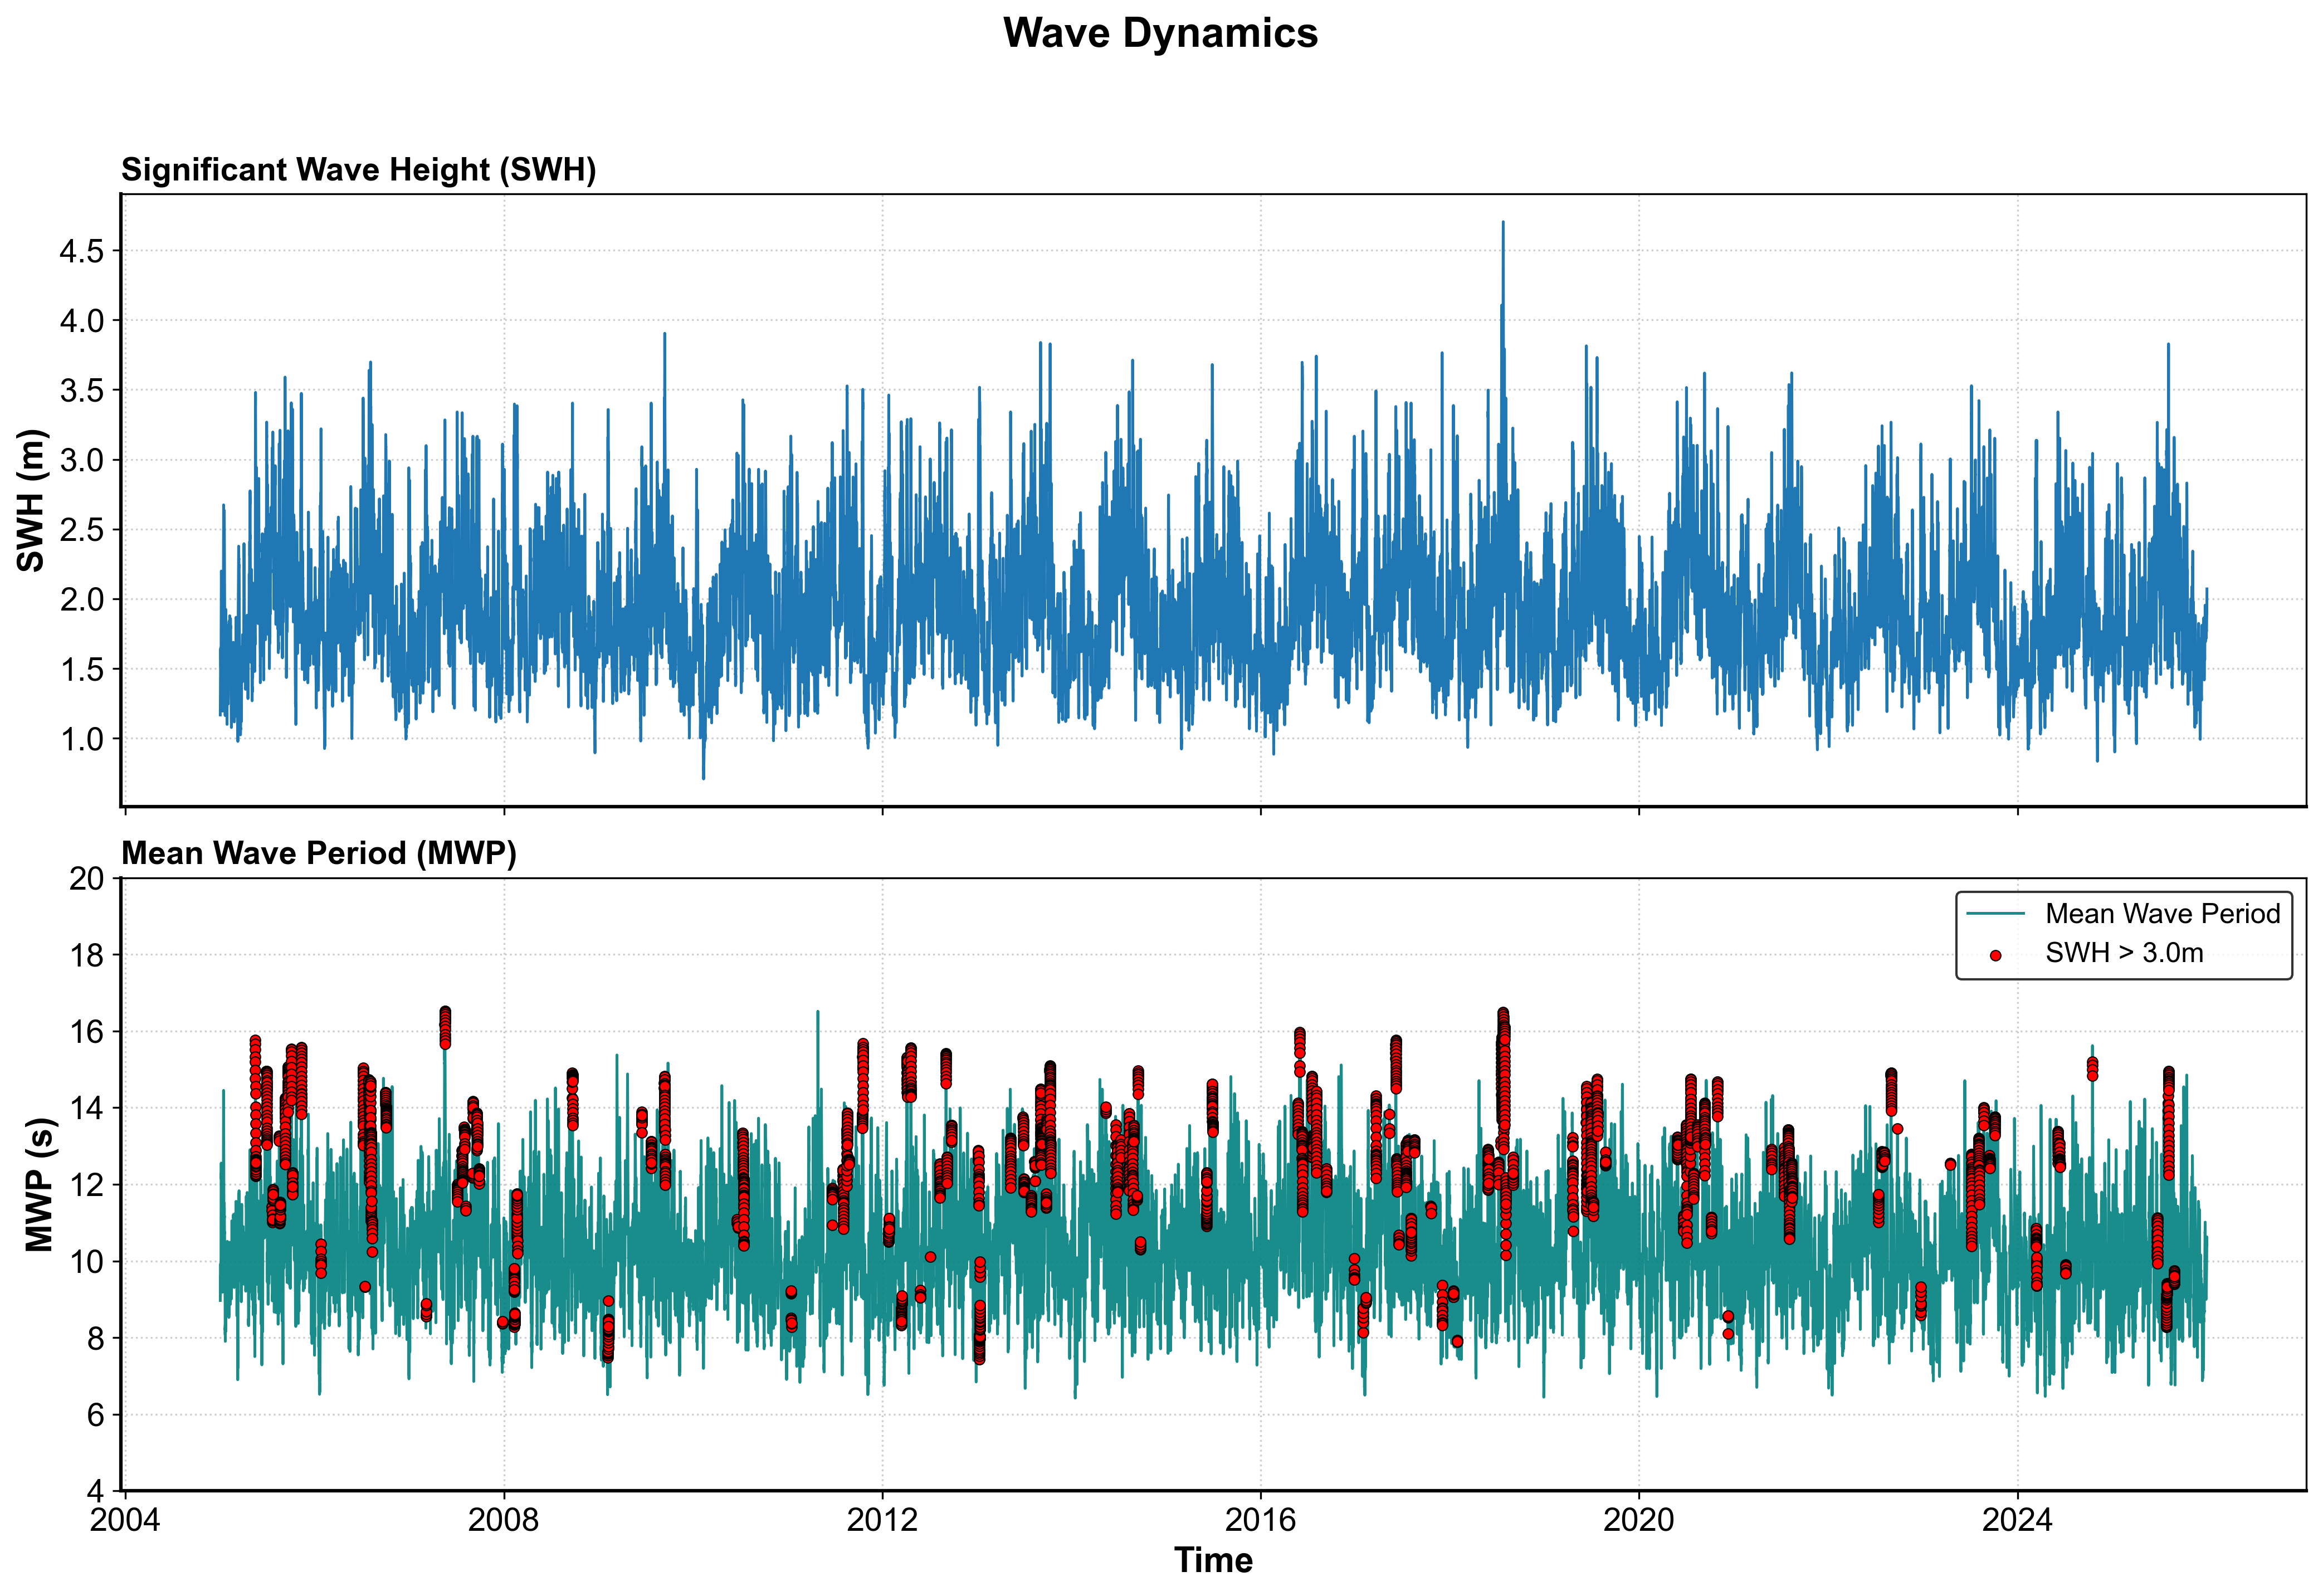

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Set font to Arial for publication quality
plt.rcParams['font.sans-serif']
plt.rcParams['font.family']

# 2. Prepare Data
df_plot = df_compiled.reset_index()

# 3. Filter for extreme waves (> 3.0m)
extreme_waves = df_plot[df_plot['swh'] > 3.0].copy()

# 4. Create the Figure with 2 Subplots
fig, (ax_swh, ax_mwp) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, dpi=300)

# --- TOP PLOT: Significant Wave Height (SWH) ---
ax_swh.plot(df_plot['time'], df_plot['swh'], color='#1f77b4', linewidth=1.2, label='Hs (m)')
ax_swh.set_ylabel('SWH (m)', fontweight='bold', fontsize=15)
ax_swh.tick_params(axis='y', labelsize=14)
ax_swh.grid(True, linestyle=':', alpha=0.6)
ax_swh.set_title('Significant Wave Height (SWH)', loc='left', fontweight='bold', fontsize=14)

# --- BOTTOM PLOT: Mean Wave Period (MWP) ---
# MWP as a SOLID LINE (using a contrasting orange color)
ax_mwp.plot(df_plot['time'], df_plot['mwp'], color='#008080', linewidth=1.2, label='Mean Wave Period', alpha=0.9)

# Highlight MWP during extreme events (> 3.0m) as RED DOTS
# We keep these as dots to make the specific event timestamps "pop"
ax_mwp.scatter(extreme_waves['time'], extreme_waves['mwp'], 
               color='red', s=20, edgecolors='black', linewidths=0.5, 
               label='SWH > 3.0m', zorder=5)

ax_mwp.set_ylabel('MWP (s)', fontweight='bold', fontsize=15)
ax_mwp.set_xlabel('Time', fontweight='bold', fontsize=15)
ax_mwp.set_ylim(4, 20)
ax_mwp.tick_params(axis='both', labelsize=14)
ax_mwp.grid(True, linestyle=':', alpha=0.6)
ax_mwp.set_title('Mean Wave Period (MWP)', loc='left', fontweight='bold', fontsize=14)

# 5. Styling & Legends
ax_mwp.legend(loc='upper right', fontsize=12, frameon=True, edgecolor='black')

# Applying your preferred "Box" look
for ax in [ax_swh, ax_mwp]:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# Add main figure title
fig.suptitle('Wave Dynamics', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 6. Save
plt.savefig('Wave_Dynamics.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 1. Set font to Arial for publication quality
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

# 2. Prepare Data
df_plot = df_compiled.reset_index()
df_plot['time'] = pd.to_datetime(df_plot['time'])
extreme_waves = df_plot[df_plot['swh'] > 3.0].copy()

# Define the Date Range
start_date = datetime(2005, 1, 1)
end_date = datetime(2025, 12, 31)

def apply_custom_styling(ax, title, ylabel):
    """Applies your preferred 'Box' look and X-axis constraints"""
    ax.set_title(title, loc='left', fontweight='bold', fontsize=14)
    ax.set_ylabel(ylabel, fontweight='bold', fontsize=15)
    ax.set_xlabel('Year', fontweight='bold', fontsize=15)
    
    # X-Axis Time Customization
    ax.set_xlim(start_date, end_date)
    ax.xaxis.set_major_locator(mdates.YearLocator(2)) # Ticks every 2 years to avoid crowding
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Styling & Ticks
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True, linestyle=':', alpha=0.6)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)



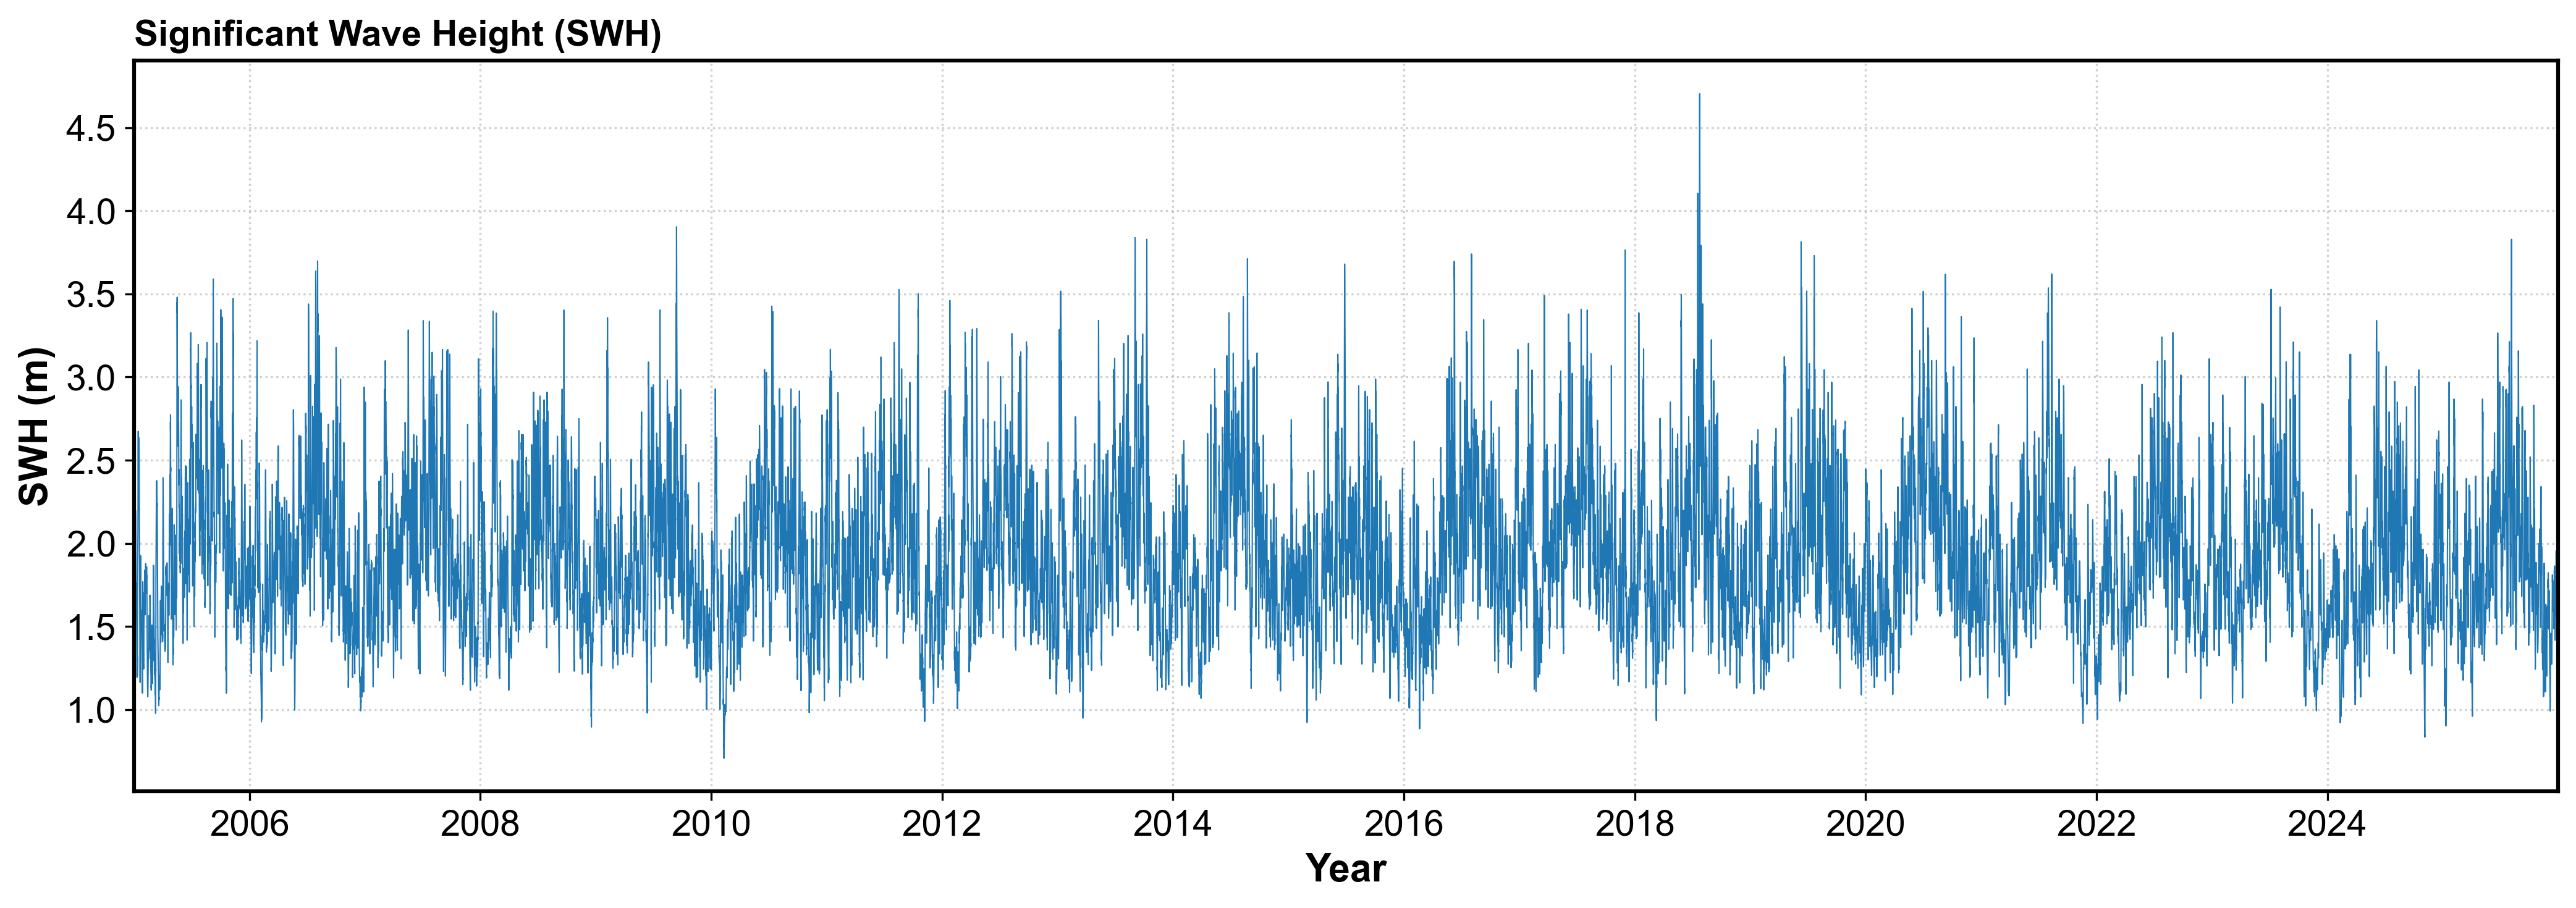

In [46]:
# --- GRAPH 1: SWH ---
fig1, ax_swh = plt.subplots(figsize=(14, 5), dpi=300)
ax_swh.plot(df_plot['time'], df_plot['swh'], color='#1f77b4', linewidth=0.5)
apply_custom_styling(ax_swh, 'Significant Wave Height (SWH)', 'SWH (m)')
fig1.tight_layout()
fig1.savefig('SWH_2005_2025.png', bbox_inches='tight')

plt.show()

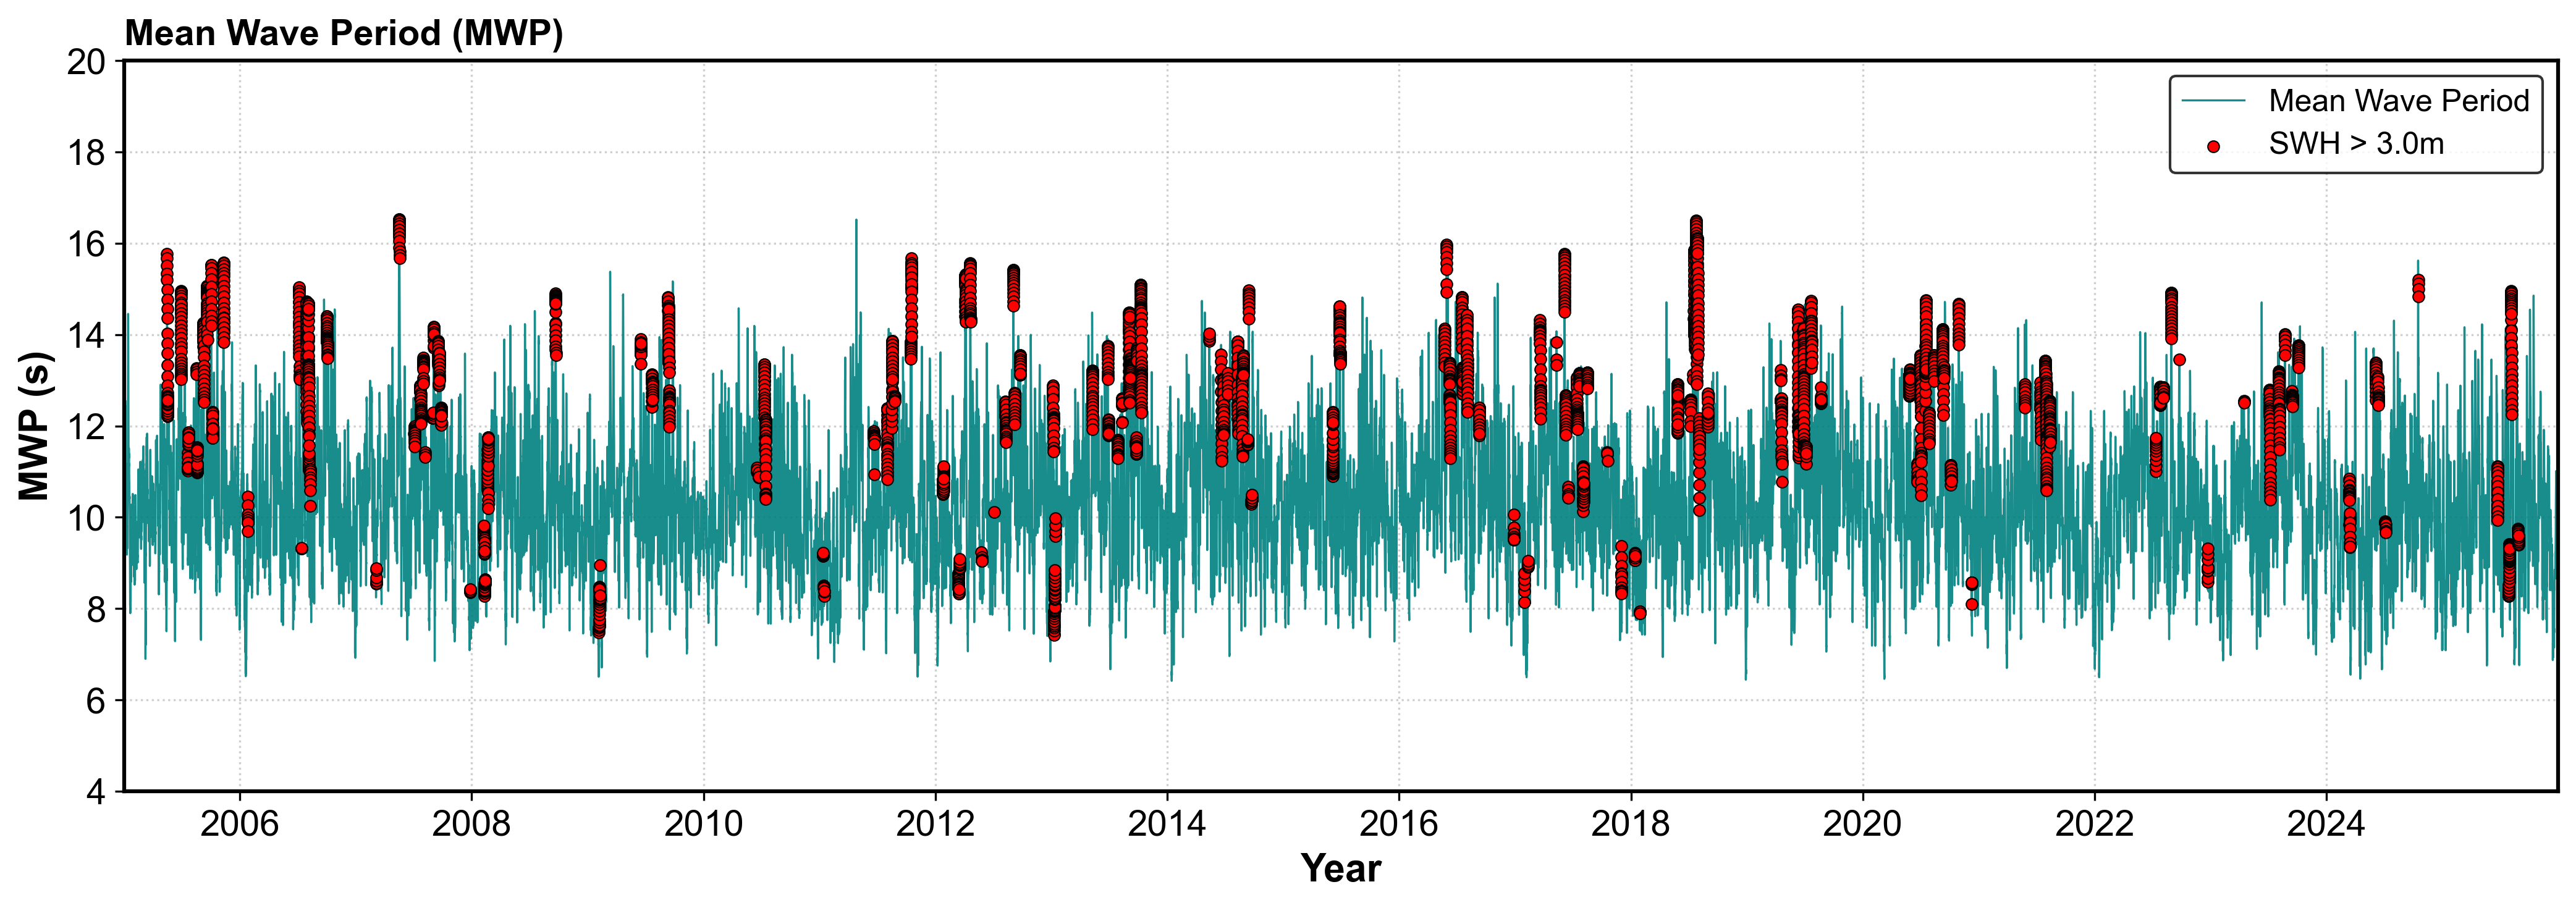

In [43]:
# --- GRAPH 2: MWP ---
fig2, ax_mwp = plt.subplots(figsize=(14, 5), dpi=300)
ax_mwp.plot(df_plot['time'], df_plot['mwp'], color='#008080', linewidth=0.8, label='Mean Wave Period', alpha=0.9)
ax_mwp.scatter(extreme_waves['time'], extreme_waves['mwp'], 
               color='red', s=20, edgecolors='black', linewidths=0.5, 
               label='SWH > 3.0m', zorder=5)

ax_mwp.set_ylim(4, 20)
ax_mwp.legend(loc='upper right', fontsize=12, frameon=True, edgecolor='black')
apply_custom_styling(ax_mwp, 'Mean Wave Period (MWP)', 'MWP (s)')

fig2.tight_layout()
fig2.savefig('MWP2005_2025.png', bbox_inches='tight')

plt.show()